In [1]:
from DataCollector import DataCollectorv2
from Dataset import DatasetHPs
from NNModel import NNModelHPs
from covit import CovitProject
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
dc = DataCollectorv2()

Building Data frame
Done building Data frame
Building remote dicts
Done building remote dicts
Building local dicts
Done building local dicts


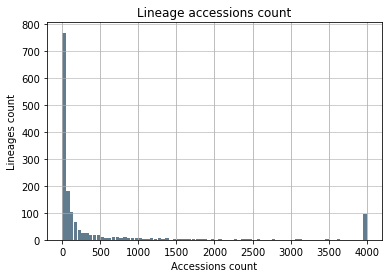

In [3]:
dc.getCountHist()

In [4]:
lins = dc.getLocalLineages(128)[:10]
dataset_hps = DatasetHPs(lineages=lins,
                         frag_len=256,
                         kmer_size=20,
                         n=192,
                         validation_split=0.2)
covit_proj = CovitProject(project_name="dummy",
                          data_collector=dc)

In [5]:
nnmodel_hps = NNModelHPs(encoder_repeats=1,
                         classes=10,
                         d_model=256, # Need to fix it to be equal to frag_len
                         d_val=64,
                         d_key=64,
                         d_ff=64,
                         heads=1,
                         dropout_rate=0.1)
covit_proj.addNNModel("nn-d",nnmodel_hps)

A Neural Network model named nn-d already exists. loading it instead of creating


2022-07-10 15:28:41.314252: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-10 15:28:41.314346: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ZJ
2022-07-10 15:28:41.314361: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ZJ
2022-07-10 15:28:41.314491: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-07-10 15:28:41.314545: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.73.5
2022-07-10 15:28:41.314559: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.73.5
2022-07-10 15:28:41.315057: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-

In [ ]:
covit_proj.train(name='nn-d',
                 epochs=1,
                 batch_size=64)

In [ ]:
covit_proj.name_nnmodel_map['nn-d'].nn.N

In [ ]:
covit_proj.name_nnmodel_map['nn-d'].deepenNN()
covit_proj.train(name='nn-d',
                 epochs=1,
                 batch_size=64)

In [ ]:
covit_proj.name_nnmodel_map['nn-d'].nn.summary()

In [6]:
res = covit_proj.getResults('nn-d')

In [7]:
print(res.getPerf())

{'loss': [2.0124804973602295, 1.6775400638580322, 0.8857930898666382, 0.49363550543785095, 0.5983390808105469], 'top1_accuracy': [0.25806450843811035, 0.3422378897666931, 0.6315523982048035, 0.8266128897666931, 0.7958669066429138], 'top2_accuracy': [0.4526209533214569, 0.5811492204666138, 0.852318525314331, 0.9465726017951965, 0.9203628897666931], 'top5_accuracy': [0.8004032373428345, 0.8845766186714172, 0.9899193644523621, 0.9909273982048035, 0.9677419066429138], 'epochs': [1, 1, 1, 1, 1], 'batch_size': [64, 64, 64, 64, 64], 'trainset_size': [2040, 2040, 2040, 2040, 2040], 'time': [9.354651732999628, 14.437540040000385, 14.480829918000381, 14.595363749998796, 16.233715206000852]}
